In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling
pd.set_option('display.max_columns', 104)
pd.set_option('display.max_rows', 175)


%matplotlib inline

In [2]:
df_store = pd.read_csv('0826export.csv')
df_store.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [3]:
f2017 = df_store.query('FISCAL_YEAR == 2017')
f2017.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [4]:
f2018 = df_store.query('FISCAL_YEAR == 2018')
f2018

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
52,7,1504,04-FEB-17,2018,1,1,22730.29,22003.18,0.033046,2017,1,1,06-FEB-16,1886.17,1855.11,181,7,1066,185.20,22730.29,123,80,103,132,0.65574,0.78030,0.71802,122,5324.06,300,22730.29,74,9657.41,38,4922.71,185.36,3022.19,226,13072.88,41,476.20,2,45.0,16,3605.97,87,5457.67,4,145.99,27,1588.95,32,230.50,2,99.49,108,0,12,7,0,5,3,0,123,12,12,108,0.082980,0.084311,0.115385,21.322974,184.799106,5.755940,-0.082339,2.777778,210.465648,0.513514,0.234228,0.246667,0.753333,0.013198,130.505541,57.844602,0.424870,0.575130,0.509734,0.132959,16.304435,122.627805,1,650,650.0,1,311,311.0,1,667,667.0,4,567,141.75,7,2195,314
53,7,1504,25-FEB-17,2018,4,1,19559.50,12770.09,0.531665,2017,4,1,27-FEB-16,1406.20,1744.41,179,7,1098,192.59,19559.35,105,43,65,85,0.63235,0.76471,0.69853,68,4934.43,242,19559.50,67,9436.68,28,3675.59,180.32,2868.06,175,10122.82,20,233.80,0,0.0,17,2843.96,66,4331.13,3,411.00,22,1240.69,37,212.00,3,159.00,99,2,5,3,0,2,1,0,107,5,5,97,0.071893,0.136601,0.095628,17.813752,186.280952,5.701231,0.436037,2.494845,201.644330,0.417910,0.252278,0.276860,0.723140,0.012373,140.845970,57.844686,0.482460,0.517540,0.389500,0.146633,15.905390,108.471051,1,671,671.0,1,332,332.0,1,688,688.0,3,542,180.67,6,2233,372
54,7,1504,04-MAR-17,2018,5,2,18430.56,19920.51,-0.074795,2017,5,2,05-MAR-16,1594.40,1582.45,180,7,882,203.86,18430.56,103,36,89,107,0.51429,0.83178,0.67303,70,4009.48,254,18430.56,62,8657.04,25,3220.68,180.64,2764.50,192,9773.52,39,501.20,0,0.0,15,3043.99,62,4027.25,2,90.00,21,1280.58,44,315.50,0,0.00,96,0,5,5,0,0,2,1,104,5,5,96,0.086508,0.079438,0.116780,20.896327,178.937476,4.326499,-0.191575,2.645833,191.985000,0.403226,0.217545,0.244094,0.755906,0.013781,139.629677,50.903750,0.469711,0.530289,0.372030,0.149995,15.303919,102.029229,1,678,678.0,1,339,339.0,1,695,695.0,3,563,187.67,6,2275,379
55,7,1504,11-MAR-17,2018,6,2,18965.47,16906.51,0.121785,2017,6,2,12-MAR-16,1865.85,1849.49,161,7,980,209.76,18965.72,104,51,78,105,0.61446,0.74286,0.67866,83,3751.30,274,18965.47,59,8166.47,25,3272.63,195.12,2789.58,215,10799.00,38,436.00,1,25.0,12,1967.99,81,5522.67,2,547.99,19,1155.75,50,325.50,1,75.00,96,1,

In [5]:
f2019 = df_store.query('FISCAL_YEAR == 2019')
f2019.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
99,7,1504,10-FEB-18,2019,1,1,18586.31,18833.99,-0.013151,2018,2,1,11-FEB-17,1681.86,1074.02,162,7,732,194.65,18586.31,94,54,77,98,0.62069,0.78571,0.70320,87,1130.02,272,18586.31,56,8057.74,28,3948.93,170.78,2126.00,216,10528.57,82,917.86,2,40.0,11,1844.50,67,5077.60,1,29.99,15,870.49,22,181.0,0,0.00,87,1,5,3,0,2,2,0,95,5,5,86,0.090489,0.057026,0.128415,25.391134,197.726702,3.760596,-0.141566,3.162791,216.119884,0.500000,0.060799,0.205882,0.794118,0.014634,143.888214,48.743380,0.433531,0.566469,0.490079,0.114385,12.448764,108.831889,0,0,0.0,0,0,0.0,1,57,57.0,3,730,243.33,4,787,197
100,7,1504,17-FEB-18,2019,2,1,19953.31,17487.04,0.141034,2018,3,1,18-FEB-17,1843.99,894.43,165,7,1009,181.87,19953.31,101,44,82,103,0.51765,0.79612,0.65688,85,2725.38,251,19953.31,58,8798.76,20,2939.87,167.24,2141.08,193,11154.55,65,788.79,0,0.0,14,2903.00,81,5955.30,4,141.99,12,710.47,12,68.0,1,9.00,97,2,2,1,0,1,2,1,104,2,2,95,0.092415,0.051148,0.100099,19.775332,197.557525,5.547919,0.040935,2.642105,210.034842,0.344828,0.136588,0.231076,0.768924,0.012579,151.702759,57.795596,0.440967,0.559033,0.334123,0.107305,12.802440,119.309436,0,0,0.0,0,0,0.0,1,64,64.0,3,751,250.33,4,815,204
101,7,1504,24-FEB-18,2019,3,1,16519.79,19559.50,-0.155408,2018,4,1,25-FEB-17,1242.87,1406.20,153,7,955,195.97,16519.79,92,51,65,94,0.62195,0.69149,0.65672,82,1005.38,199,16519.79,51,7644.70,10,1585.00,153.14,2211.12,148,8875.09,32,374.89,0,0.0,18,3101.49,56,4249.52,2,66.00,4,268.00,27,154.0,1,49.99,89,1,2,1,0,1,1,0,93,2,2,88,0.075235,0.071893,0.096335,17.298209,179.562935,4.873195,-0.251743,2.261364,187.724886,0.196078,0.060859,0.256281,0.743719,0.012046,149.896078,59.966824,0.462760,0.537240,0.207333,0.133847,14.438553,107.873776,1,986,986.0,0,0,0.0,1,71,71.0,2,715,357.50,4,1772,443
102,7,1504,03-MAR-18,2019,4,1,19880.90,18430.56,0.078692,2018,5,2,04-MAR-17,1626.53,1594.40,136,7,887,153.39,19881.15,93,50,72,99,0.53191,0.72727,0.62959,94,689.25,200,19880.90,61,9430.54,26,4030.59,136.93,2245.72,139,10450.36,25,313.40,1,22.0,14,3277.18,66,4899.40,3,138.00,15,928.48,8,58.5,0,0.00,88,1,5,5,0,0,0,0,94,5,5,87,0.081814,0.086508,0.104848,22.41364

In [6]:
f2020 = df_store.query('FISCAL_YEAR == 2020')
f2020.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
147,7,1504,23-FEB-19,2020,3,1,20798.58,16519.79,0.259010,2019,3,1,24-FEB-18,998.75,1242.87,186,7,1297,191.73,20798.76,108,63,73,110,0.64948,0.66364,0.65656,97,3026.15,257,20798.58,61,9206.61,23,3703.83,191.72,2914.08,196,11591.97,40,459.10,1,39.5,20,3392.45,61,4839.60,5,890.00,16,952.00,37,183.50,4,68.97,107,1,1,1,0,0,0,0,109,1,1,106,0.048020,0.075235,0.083269,16.035914,192.579444,6.764721,0.175741,2.424528,196.213019,0.377049,0.145498,0.237354,0.762646,0.012357,150.928033,59.142704,0.442656,0.557344,0.402301,0.140110,15.199666,108.484144,1,1350,1350.0,1,155,155.0,2,149,74.5,1,105,105.0,5,1759,352
148,7,1504,09-MAR-19,2020,5,2,13876.14,21365.67,-0.350540,2019,5,2,10-MAR-18,913.60,1313.76,175,7,977,177.02,13875.65,81,56,63,91,0.68293,0.69231,0.68762,82,1663.99,153,13876.14,41,6874.87,11,1941.00,177.00,2476.77,112,7001.27,27,307.99,1,25.0,11,1855.48,39,2898.95,1,1.98,12,759.49,10,63.00,2,18.00,78,7,3,2,0,1,0,0,88,3,3,71,0.065840,0.061489,0.082907,14.202805,171.310370,5.519150,-0.433447,2.154930,195.438592,0.268293,0.119917,0.267974,0.732026,0.011026,167.679756,62.511339,0.495445,0.504555,0.282333,0.178491,13.993051,78.396271,1,1364,1364.0,1,169,169.0,1,50,50.0,2,349,174.5,5,1932,386
149,7,1504,23-MAR-19,2020,7,2,11654.00,19292.92,-0.395944,2019,7,2,24-MAR-18,1102.70,1318.60,149,7,852,149.29,11623.86,78,43,61,78,0.62319,0.78205,0.70262,69,1050.90,167,11654.00,37,5277.67,15,2047.88,149.34,2222.87,130,6376.33,38,479.20,1,25.0,7,1376.99,41,2902.93,2,91.99,9,531.48,24,176.85,1,79.50,71,1,3,3,0,0,4,0,79,3,3,70,0.094620,0.068346,0.091549,13.678404,149.410256,5.707013,-0.487493,2.385714,166.485714,0.405405,0.090175,0.221557,0.778443,0.014330,142.639730,49.048692,0.452863,0.547137,0.388027,0.190739,14.884626,78.036695,1,1378,1378.0,1,183,183.0,1,64,64.0,2,377,188.5,5,2002,400
150,7,1504,06-APR-19,2020,9,3,13138.60,12855.26,0.022041,2019,9,3,07-APR-18,1119.36,1213.95,158,7,839,162.72,13139.10,72,56,73,79,0.86154,0.92405,0.89279,65,2321.29,159,13138.60,39,6048.82,10,1514.98,162.70,2297.75,120,7089.78,24,288.40,0,0.0,7,1676.01,58,4570.37,0,0.00,5,317.50,25,108.00,0,0.00,65,2,6,5,0,1,1,0,74,6,6,63,0.08519

In [7]:
comp_diff = df_store.groupby('FISCAL_YEAR')['COMP_PCT'].sum()
comp_diff

FISCAL_YEAR
2017    617.663933
2018    139.027339
2019    771.099684
2020     75.757324
Name: COMP_PCT, dtype: float64

In [8]:
comp_min = df_store.groupby('STORE').agg({'COMP_PCT': 'min'})
comp_min

,COMP_PCT
STORE,
1504,-0.498283
1505,-0.463546
1508,-0.392756
1514,-0.440151
1521,-0.441287
1533,-0.458044
1539,-0.284616
1545,-0.460432
1547,-0.448755


In [9]:
comp_max = df_store.groupby('STORE').agg({'COMP_PCT':'max'})
comp_max

,COMP_PCT
STORE,
1504,0.620455
1505,0.672325
1508,7.945772
1514,1.214695
1521,2.177509
1533,1.467259
1539,1.011597
1545,0.933058
1547,1.076542


In [10]:
store_agg = df_store.groupby(['FISCAL_YEAR']).agg({'STORE':sum})
store_agg

,STORE
FISCAL_YEAR,
2017,13667843
2018,14043275
2019,14961924
2020,7609946


In [11]:
sales2019 = f2019.drop(['DIV','FISCAL_WEEK','FISCAL_YEAR_LY','FISCAL_WEEK_LY','FISCAL_MONTH_LY','WEEK_END_DATE_LY','MARK_DOWN_AMT_TY','MARK_DOWN_AMT_LY','PAYROLL_ADJ_HOURS','NUM_OF_DAYS','STRAK_SALES_AMT','STRAK_TRANSACTION_NUM','CP_VALID_EMAILS','CP_VALID_MAILING_ADDRESS','CP_TOTAL_TRANS','CP_EMAILS_PER_TRANS','CP_MAIL_ADD_CAPTURE_RATE','CP_EMAIL_MAIL_CAPTURE_RATE','CP_TOTAL_EMAIL_TRANS','SPECIAL_ORDER_AMT','SALES_UNITS','SALES_VALUE','SHOES_UNITS','SHOES_VALUE','MULTI_UNITS','MULTI_VALUE','PAYROLL_UNITS','PAYROLL_VALUE','ACCESSORY_UNITS','ACCESSORY_VALUE','ACCESSORY_HOSIERY_UNITS','ACCESSORY_HOSIERY_VALUE','ACCESSORY_SHOE_TREES_UNITS','ACCESSORY_SHOE_TREES_VALUE','ACCESSORY_COATS_UNITS','ACCESSORY_COATS_VALUE','ACCESSORY_SHIRT_SWEATER_UNITS','ACCESSORY_SHIRT_SWEATER_VALUE','ACCESSORY_PLGS_LUGGAGE_UNITS','ACCESSORY_PLGS_LUGGAGE_VALUE','ACCESSORY_BELTS_UNITS','ACCESSORY_BELTS_VALUE','ACCESSORY_SHOE_CARE_UNITS','ACCESSORY_SHOE_CARE_VALUE','ACCESSORY_OTHER_UNITS','ACCESSORY_OTHER_VALUE','TRANS_CNT_SALES','TRANS_CNT_RETURNS','TRANS_CNT_EXCHG','TRANS_CNT_EXCHG_EVEN','TRANS_CNT_EXCHG_OUT','TRANS_CNT_EXCHG_IN','TRANS_CNT_EMPL_SALES','TRANS_CNT_EMPL_RETURNS','TRANS_CNT_TOTAL','TRANS_CNT_EXCHG_CASHIER','TRANS_CNT_EXCHG_ORIGINAL','METRIC_TRANS_NUM','TY_MARK_DOWN_PCT','LY_MARK_DOWN_PCT','STRAK_CONVERSION_PCT','STRAK_SLS_PER_SHOPPER','STRAK_AVG_TRANS_SIZE','STRAK_SHOPPER_TO_ASSOC_RATIO','STRAK_COMP_TRAFFIC_DELTA','UNITS_PER_TRANS','DOLLAR_PER_TRANS','SHOE_MULTI_PCT','SPECIAL_ORDER_PCT_TO_SLS','FOOTWEAR_UNITS_PCT','NONFOOTWEAR_UNITS_PCT','AVG_UNIT_PRICE','AVG_FOOTWEWAR_PRICE','AVG_NONFOOTWEWAR_PRICE','FOOTWEAR_AMT_PCT','NONFOOTWEAR_AMT_PCT','MULTI_AMT_PCT','PAYROLL_PCT','AVG_PAY_PER_HR','SALES_AMT_PER_PAY_HOUR','MGR_COUNT','MGR_TENURE_DAYS','AVG_MGR_TENURE_DAYS','AM_COUNT','AM_TENURE_DAYS','AVG_AM_TENURE_DAYS','FT_COUNT','FT_TENURE_DAYS','AVG_FT_TENURE_DAYS','PT_COUNT','PT_TENURE_DAYS','AVG_PT_TENURE_DAYS','NUM_OF_EMPS','TOT_TENURE_DAYS','TOT_AVG_TENURE_DAYS'],axis=1)
sales2019
                        

,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,STRAK_TRAFFIC,STRAK_HRS
99,1504,10-FEB-18,2019,1,18586.31,18833.99,-0.013151,732,194.65
100,1504,17-FEB-18,2019,1,19953.31,17487.04,0.141034,1009,181.87
101,1504,24-FEB-18,2019,1,16519.79,19559.50,-0.155408,955,195.97
102,1504,03-MAR-18,2019,1,19880.90,18430.56,0.078692,887,153.39
103,1504,17-MAR-18,2019,2,23734.50,14873.95,0.595709,1022,205.75
...,...,...,...,...,...,...,...,...,...
27163,2089,05-JAN-19,2019,12,26980.06,16882.56,0.598102,2100,152.08
27164,2089,12-JAN-19,2019,12,13369.45,14039.26,-0.047710,1060,131.42
27165,2089,19-JAN-19,2019,12,14302.18,15721.43,-0.090275,996,128.86
27166,2089,26-JAN-19,2019,12,14427.25,11516.19,0.252780,1034,127.83


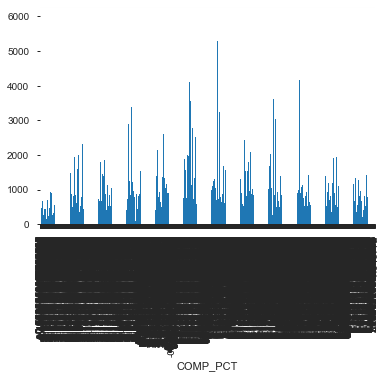

In [12]:
sales2019.groupby('COMP_PCT')['STRAK_TRAFFIC'].sum().plot(kind='bar')

Text(0.5, 1.0, 'Comp_PCT per Month')

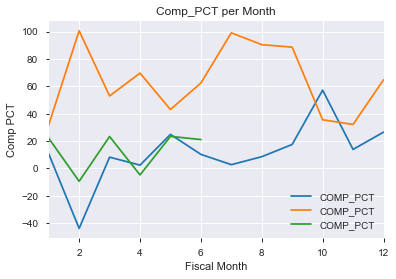

In [13]:
f2018.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot(legend='2018')
f2019.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot(legend='2019')
f2020.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot(legend='2020')
plt.xlabel('Fiscal Month')
plt.ylabel('Comp PCT')
plt.title('Comp_PCT per Month')

In [14]:
#df_store.loc[div_groups.groups[7], :]

In [15]:
#pandas_profiling.ProfileReport(f2019)

Text(0.5, 1.0, 'SALES/MONTH')

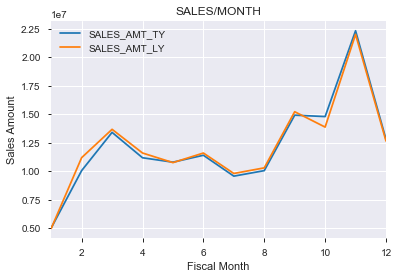

In [16]:
f2018.groupby('FISCAL_MONTH')['SALES_AMT_TY'].sum().plot(legend='TY 2018')
f2018.groupby('FISCAL_MONTH')['SALES_AMT_LY'].sum().plot(legend='LY 2018')
plt.xlabel('Fiscal Month')
plt.ylabel('Sales Amount')
plt.title('SALES/MONTH')

Text(0.5, 1.0, 'SALES/MONTH')

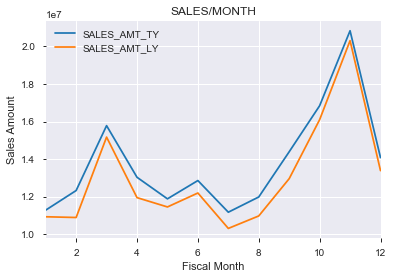

In [17]:
f2019.groupby('FISCAL_MONTH')['SALES_AMT_TY'].sum().plot(legend='TY 2019')
f2019.groupby('FISCAL_MONTH')['SALES_AMT_LY'].sum().plot(legend='LY 2019')
plt.xlabel('Fiscal Month')
plt.ylabel('Sales Amount')
plt.title('SALES/MONTH')

Text(0.5, 1.0, 'SALES/MONTH')

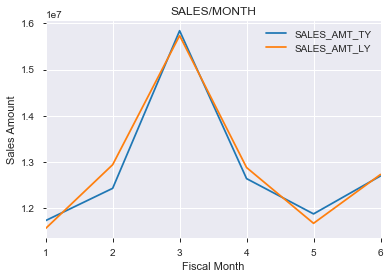

In [18]:
f2020.groupby('FISCAL_MONTH')['SALES_AMT_TY'].sum().plot(legend='TY 2020')
f2020.groupby('FISCAL_MONTH')['SALES_AMT_LY'].sum().plot(legend='LY 2020')
plt.xlabel('Fiscal Month')
plt.ylabel('Sales Amount')
plt.title('SALES/MONTH')

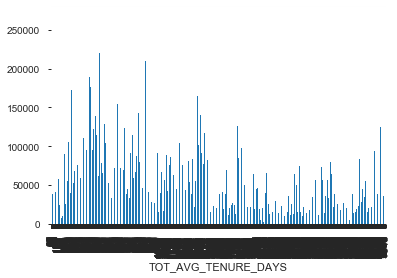

In [120]:
f2019.groupby('TOT_AVG_TENURE_DAYS')['SALES_AMT_TY'].sum().plot(kind='bar')

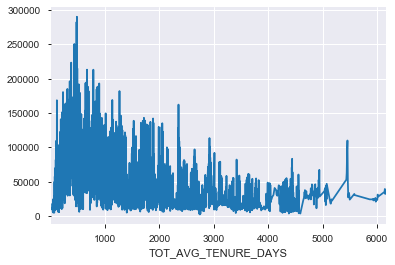

In [20]:
f2018.groupby('TOT_AVG_TENURE_DAYS')['SALES_AMT_TY'].sum().plot()

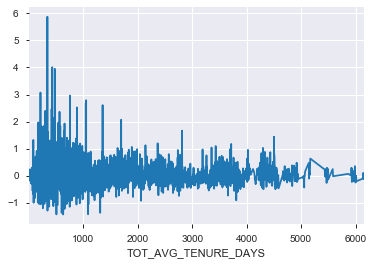

In [21]:
f2018.groupby('TOT_AVG_TENURE_DAYS')['COMP_PCT'].sum().plot()

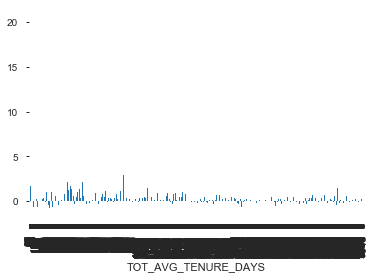

In [121]:
f2019.groupby('TOT_AVG_TENURE_DAYS')['COMP_PCT'].sum().plot(kind='bar')

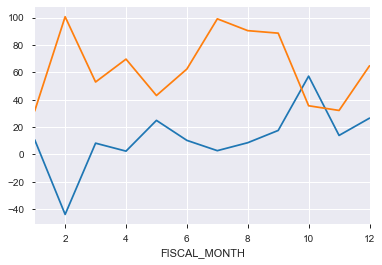

In [23]:
#f2017.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot()
f2018.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot()
f2019.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot()

In [24]:
#comp18_19 = pd.concat([f2018, f2019])
#comp18_19

In [25]:
#comp18_19.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot()

In [26]:
Comp_pct2017 = f2017.groupby(['COMP_PCT']).agg({'STORE':sum})
Comp_pct2017.head()

,STORE
COMP_PCT,
-0.778297,1832
-0.700524,2027
-0.685593,1672
-0.680211,1643
-0.659783,2016


In [27]:
store_master= pd.read_excel('store_master.xlsx')
store_master.tail(10)

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
165,7,2078,01-NOV-13,NaN,NE,68028,GRETNA,2400,Outlet,F,2
166,7,2079,01-JUL-14,NaN,NC,28278,CHARLOTTE,2471,Outlet,F,4
167,7,2080,01-MAY-15,NaN,NC,288062554,ASHEVILLE,2500,Outlet,F,1
168,7,2082,01-MAY-16,NaN,OH,430747509,SUNBURY,2450,Outlet,F,1
169,7,2083,01-NOV-15,NaN,MS,386715859,SOUTHAVEN,2700,Outlet,F,1
170,7,2084,01-JUL-15,NaN,MI,493158826,BYRON CENTER,3000,Outlet,F,3
171,7,2085,01-OCT-15,NaN,FL,33559,TAMPA,2500,Outlet,F,3
172,7,2087,01-OCT-17,NaN,TX,761773312,FORT WORTH,2500,Outlet,F,1
173,7,2088,01-OCT-16,NaN,MD,208710876,CLARKSBURG,2400,Outlet,F,2
174,7,2089,01-NOV-16,NaN,AZ,852265502,CHANDLER,2714,Outlet,F,3


In [49]:
stores_closed = store_master.dropna(how='all', subset=['CLOSE_DATE'])
stores_closed

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
24,7,1643,01-OCT-97,31-DEC-17,LA,70836,BATON ROUGE,943,Mall,S,1
28,7,1652,22-MAY-97,27-MAR-19,NJ,8002,CHERRY HILL,1745,Mall,S,2
35,7,1670,15-JUN-00,30-JAN-19,NY,10017,NEW YORK,2500,Street,S,5
56,7,1711,01-MAR-05,01-APR-19,MA,2128,BOSTON,825,Airport,A,1
60,7,1717,30-MAR-19,30-MAR-19,MA,2128,BOSTON,974,Airport,A,1
71,7,1803,15-JUN-06,29-MAY-19,DC,20005,WASHINTON,1412,Street,S,1
81,7,1820,14-SEP-07,17-SEP-17,TN,37215,NASHVILLE,2496,Lifestyle,S,2
85,7,1830,15-APR-06,26-APR-16,NJ,8053,MARLTON,1846,Open Air,S,1
87,7,1832,17-AUG-08,30-JAN-19,FL,32246,JACKSONVILLE,2500,Open Air,S,2
152,7,2065,15-MAR-06,01-JUN-16,WA,98271,TULALIP,2500,Outlet,F,1


In [110]:
Nashville_store = df_store.query('STORE == 1820')
Nashville_store.tail()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
12798,7,1820,19-AUG-17,2018,29,7,9158.14,11718.86,-0.218513,2017,29,7,20-AUG-16,484.72,702.35,79,7,280,80.03,9158.14,63,47,75,77,0.66197,0.97403,0.81800,71,1820.48,145,9158.14,40,6365.69,10,1631.79,80.01,1823.52,105,2792.45,38,323.54,8,199.5,2,536.00,9,526.72,2,109.20,12,664.00,31,233.50,3,199.99,54,7,8,5,0,3,1,0,70,8,8,47,0.052928,0.059933,0.225000,32.707643,145.367302,3.498688,-0.443513,3.085106,194.854043,0.250000,0.198783,0.275862,0.724138,0.015833,159.142250,26.594762,0.695085,0.304915,0.256341,0.199115,22.791151,114.462442,1,10224,10224.0,1,531,531.0,0,0,0.0,2,1267,633.5,4,12022,3006
12799,7,1820,26-AUG-17,2018,30,7,10603.07,10232.19,0.036246,2017,30,7,27-AUG-16,750.83,462.16,94,7,362,94.68,10603.07,65,50,71,76,0.75758,0.93421,0.84589,66,1112.65,168,10603.07,47,6470.42,23,3200.93,94.65,1502.07,121,4132.65,46,510.80,5,120.0,2,366.00,24,1684.99,1,49.99,19,1200.99,24,195.50,1,28.00,57,3,8,4,0,4,0,0,68,8,8,54,0.070813,0.045167,0.179558,29.290249,163.124154,3.823405,-0.143312,3.111111,196.353148,0.489362,0.104937,0.279762,0.720238,0.015844,137.668511,34.154132,0.610240,0.389760,0.494702,0.141664,15.869731,112.023983,1,10231,10231.0,1,538,538.0,0,0,0.0,2,1281,640.5,4,12050,3013
12800,7,1820,02-SEP-17,2018,31,8,10212.00,12196.52,-0.162712,2017,31,8,03-SEP-16,1109.49,983.20,84,7,296,85.03,10212.00,69,41,73,77,0.71930,0.94805,0.83368,57,2459.27,175,10212.00,40,6395.58,16,2382.68,85.04,1440.52,135,3816.42,47,456.66,4,95.0,1,172.00,29,1942.74,2,72.99,12,714.69,37,189.54,2,84.00,61,6,6,4,0,2,2,0,75,6,6,55,0.108646,0.080613,0.233108,34.500000,148.000000,3.481124,-0.395820,3.181818,185.672727,0.400000,0.240822,0.228571,0.771429,0.017137,159.889500,28.269778,0.626281,0.373719,0.372551,0.141061,16.939323,120.084666,1,10238,10238.0,1,545,545.0,0,0,0.0,2,1295,647.5,4,12078,3020
12801,7,1820,09-SEP-17,2018,32,8,12132.61,14706.68,-0.175027,2017,32,8,10-SEP-16,937.10,1190.35,93,7,341,94.70,12132.61,64,40,65,70,0.65574,0.92857,0.79215,61,2552.86,169,12132.61,46,6857.77,20,2831.78,94.67,1636.85,123,5274.84,29,314.40,8,267.0,6,1069.99,32,2281.96,1,28.00,20,1160.49,27,153.00,0,0.00,61,3,3,2,0,1,0,0,67,3,3,58,

In [119]:
Nashville_2017 = Nashville_store.query('FISCAL_YEAR == 2017')
Nashville_2018 = Nashville_store.query('FISCAL_YEAR == 2018')

In [117]:
loss_2017 = Nashville_2017.query('COMP_PCT < 1')
loss_2018 = Nashville_2018.query('COMP_PCT < 1')

In [118]:
profit_2017 = Nashville_2017.query('COMP_PCT > 1')
profit_2018 = Nashville_2018.query('COMP_PCT > 1')

Text(0.5, 1.0, 'Nashville Store#1820 Sales Performance')

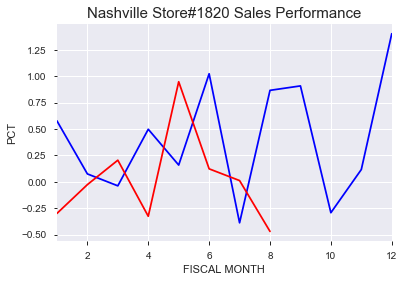

In [94]:
Nashville_2017.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot(color='blue')
Nashville_2018.groupby('FISCAL_MONTH')['COMP_PCT'].sum().plot(color='red')
plt.xlabel('FISCAL MONTH')
plt.ylabel('PCT')
plt.title('Nashville Store#1820 Sales Performance', size=15)

In [47]:
stores_closed[['STORE']].count()

STORE    10
dtype: int64

In [43]:
stores_open = store_master[store_master['CLOSE_DATE'].isnull()]
stores_open.tail()

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
170,7,2084,01-JUL-15,NaN,MI,493158826,BYRON CENTER,3000,Outlet,F,3
171,7,2085,01-OCT-15,NaN,FL,33559,TAMPA,2500,Outlet,F,3
172,7,2087,01-OCT-17,NaN,TX,761773312,FORT WORTH,2500,Outlet,F,1
173,7,2088,01-OCT-16,NaN,MD,208710876,CLARKSBURG,2400,Outlet,F,2
174,7,2089,01-NOV-16,NaN,AZ,852265502,CHANDLER,2714,Outlet,F,3


In [48]:
stores_open[['STORE']].count()

STORE    165
dtype: int64